### Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with_price_df = pd.read_csv('with_price.csv')

In [4]:
with_price_df.head(3)

,Deal Type,Announce Date,Amendment Date,Completion/Termination Date,Target Name,Target Ticker,Acquirer Name,Seller Name,Announced Total Value (mil.),Announced Equity Value (mil.),...,Payment Type,TV/EBITDA,Deal Status,Arb Spread (Gross),Stock Terms,Cash Terms,Nature of Bid,Target Termination Fee,Acquirer Termination Fee,Price History
0,M&A,2023-10-11,,2024-05-03,Pioneer Natural Resources Co,PXD US,Exxon Mobil Corp,NaN,67995.45,62377.45,...,Stock,5.39,Completed,,2.3234 Aqr sh./Tgt sh.,NaN,Friendly,,,"[{'date': Timestamp('2023-10-11 00:00:00'), 'p..."
1,M&A,2023-09-21,,2024-03-19,Splunk Inc,SPLK US,Cisco Systems Inc,NaN,27951.21,26328.90,...,Cash,,Completed,,,157.0000/sh.,Friendly,,,"[{'date': Timestamp('2023-09-21 00:00:00'), 'p..."
2,M&A,2024-04-19,,2024-08-07,Paramount Global,PARA US,"Sony Group Corp,Apollo Global Management Inc",NaN,26000.00,26000.00,...,Cash,89.04,Withdrawn,,,26000.0000 Mln,Friendly,,,"[{'date': Timestamp('2024-04-19 00:00:00'), 'p..."


In [5]:
cash_deals_df = with_price_df[with_price_df['Payment Type'] == 'Cash']
stock_deals_df = with_price_df[with_price_df['Payment Type'] == 'Stock']
cash_deals_df.head(5)

,Deal Type,Announce Date,Amendment Date,Completion/Termination Date,Target Name,Target Ticker,Acquirer Name,Seller Name,Announced Total Value (mil.),Announced Equity Value (mil.),...,Payment Type,TV/EBITDA,Deal Status,Arb Spread (Gross),Stock Terms,Cash Terms,Nature of Bid,Target Termination Fee,Acquirer Termination Fee,Price History
1,M&A,2023-09-21,,2024-03-19,Splunk Inc,SPLK US,Cisco Systems Inc,NaN,27951.21,26328.90,...,Cash,,Completed,,,157.0000/sh.,Friendly,,,"[{'date': Timestamp('2023-09-21 00:00:00'), 'p..."
2,M&A,2024-04-19,,2024-08-07,Paramount Global,PARA US,"Sony Group Corp,Apollo Global Management Inc",NaN,26000.00,26000.00,...,Cash,89.04,Withdrawn,,,26000.0000 Mln,Friendly,,,"[{'date': Timestamp('2024-04-19 00:00:00'), 'p..."
3,M&A,2022-10-14,,2024-12-11,Albertsons Cos Inc,ACI US,Kroger Co/The,NaN,25371.97,14494.27,...,Cash,5.88,Terminated,,,27.2500/sh.,Friendly,600,318,"[{'date': Timestamp('2022-10-14 00:00:00'), 'p..."
5,M&A,2024-04-03,,2024-06-11,Paramount Global,PARA US,Skydance Media LLC,NaN,23535.90,10112.90,...,Cash,80.6,Withdrawn,3.49,,15.0000/sh.,Friendly,,,"[{'date': Timestamp('2024-04-03 00:00:00'), 'p..."
8,M&A,2024-05-07,,2024-06-26,International Paper Co,IP US,Suzano SA,NaN,19415.96,14587.96,...,Cash,8.53,Withdrawn,-10.51,,42.0000/sh.,Friendly,,,"[{'date': Timestamp('2024-05-07 00:00:00'), 'p..."


In [6]:
stock_deals_df.head(5)

,Deal Type,Announce Date,Amendment Date,Completion/Termination Date,Target Name,Target Ticker,Acquirer Name,Seller Name,Announced Total Value (mil.),Announced Equity Value (mil.),...,Payment Type,TV/EBITDA,Deal Status,Arb Spread (Gross),Stock Terms,Cash Terms,Nature of Bid,Target Termination Fee,Acquirer Termination Fee,Price History
0,M&A,2023-10-11,,2024-05-03,Pioneer Natural Resources Co,PXD US,Exxon Mobil Corp,NaN,67995.45,62377.45,...,Stock,5.39,Completed,,2.3234 Aqr sh./Tgt sh.,NaN,Friendly,,,"[{'date': Timestamp('2023-10-11 00:00:00'), 'p..."
4,M&A,2023-08-08,2023-10-02 00:00:00,2024-01-02,DISH Network Corp,DISH US,EchoStar Corp,NaN,24441.32,1846.24,...,Stock,7.9,Completed,,.3509 Aqr sh./Tgt sh.,NaN,Friendly,,,"[{'date': Timestamp('2023-08-08 00:00:00'), 'p..."
6,M&A,2024-05-28,,2024-11-22,Marathon Oil Corp,MRO US,ConocoPhillips,NaN,22921.61,17542.61,...,Stock,5.22,Completed,,.2550 Aqr sh./Tgt sh.,NaN,Friendly,,,"[{'date': Timestamp('2024-05-28 00:00:00'), 'p..."
10,M&A,2024-03-11,,2024-07-22,Equitrans Midstream Corp,ETRN US,EQT Corp,NaN,12880.88,5524.15,...,Stock,12.38,Completed,,.3504 Aqr sh./Tgt sh.,NaN,Friendly,191,176,"[{'date': Timestamp('2024-03-11 00:00:00'), 'p..."
13,M&A,2024-01-11,,2024-10-01,Southwestern Energy Co,SWN US,Expand Energy Corp,NaN,11597.17,7349.17,...,Stock,1.35,Completed,,.0867 Aqr sh./Tgt sh.,NaN,Friendly,260,389,"[{'date': Timestamp('2024-01-11 00:00:00'), 'p..."


In [7]:
# sort cash deals by announced total value in descending order
cash_deals_df_by_value = cash_deals_df.sort_values(by='Announced Total Value (mil.)', ascending=False)
cash_deals_df_by_value.head(5)

,Deal Type,Announce Date,Amendment Date,Completion/Termination Date,Target Name,Target Ticker,Acquirer Name,Seller Name,Announced Total Value (mil.),Announced Equity Value (mil.),...,Payment Type,TV/EBITDA,Deal Status,Arb Spread (Gross),Stock Terms,Cash Terms,Nature of Bid,Target Termination Fee,Acquirer Termination Fee,Price History
360,M&A,2017-01-26,,2017-12-01,Charter Communications Inc,CHTR US,Verizon Communications Inc,NaN,169097.16,108266.16,...,Cash,16.48,Withdrawn,21.58,,400.0000/sh.,Friendly,,,"[{'date': Timestamp('2017-01-26 00:00:00'), 'p..."
361,M&A,2017-02-14,,2017-08-14,Bristol-Myers Squibb Co,BMY US,Potential Buyer,NaN,119079.94,120848.94,...,Cash,23.76,Withdrawn,12.18,,72.0000/sh.,Friendly,,,"[{'date': Timestamp('2017-02-14 00:00:00'), 'p..."
310,M&A,2017-05-17,,2018-01-29,Colgate-Palmolive Co,CL US,Potential Buyer,NaN,93399.28,88329.28,...,Cash,21.72,Withdrawn,8.25,,100.0000/sh.,Friendly,,,"[{'date': Timestamp('2017-05-17 00:00:00'), 'p..."
311,M&A,2018-08-07,,2018-08-25,Tesla Inc,TSLA US,Management Group,NaN,80399.84,71649.11,...,Cash,,Withdrawn,140.9,,420.0000/sh.,Friendly,,,"[{'date': Timestamp('2018-08-07 00:00:00'), 'p..."
312,M&A,2018-02-12,,2018-07-19,TFCF Corp,TFCFA US,Comcast Corp,NaN,77463.90,64838.90,...,Cash,12.02,Withdrawn,,,35.0000/sh.,Friendly,,2500,"[{'date': Timestamp('2018-02-12 00:00:00'), 'p..."


In [8]:
# split into quartile data frames based on announced total value
cash_deals_df_by_value['Announced Total Value (mil.)'].describe()

count       427.000000
mean       9931.721030
std       13843.161203
min        1337.470000
25%        4397.215000
50%        6376.400000
75%        9898.055000
max      169097.160000
Name: Announced Total Value (mil.), dtype: float64

In [9]:
#separate into four dfs based on quartiles
first_quartile = 4397.215
second_quartile = 6376.400
third_quartile = 9898.055

q1 = cash_deals_df_by_value[cash_deals_df_by_value['Announced Total Value (mil.)'] <= first_quartile]
q2 = cash_deals_df_by_value[(cash_deals_df_by_value['Announced Total Value (mil.)'] > first_quartile) & (cash_deals_df_by_value['Announced Total Value (mil.)'] <= second_quartile)]
q3 = cash_deals_df_by_value[(cash_deals_df_by_value['Announced Total Value (mil.)'] > second_quartile) & (cash_deals_df_by_value['Announced Total Value (mil.)'] <= third_quartile)]
q4 = cash_deals_df_by_value[cash_deals_df_by_value['Announced Total Value (mil.)'] > third_quartile]

In [10]:
# get possible values of "Deal Status" column
cash_deals_df_by_value['Deal Status'].unique()

array(['Withdrawn', 'Completed', 'Terminated'], dtype=object)

In [11]:
# get withdrawn counts of each quartile
q1_withdrawn = q1[q1['Deal Status'] == 'Withdrawn'].shape[0]
q2_withdrawn = q2[q2['Deal Status'] == 'Withdrawn'].shape[0]
q3_withdrawn = q3[q3['Deal Status'] == 'Withdrawn'].shape[0]
q4_withdrawn = q4[q4['Deal Status'] == 'Withdrawn'].shape[0]
print(q1_withdrawn, q2_withdrawn, q3_withdrawn, q4_withdrawn)

# get terminated counts of each quartile
q1_terminated = q1[q1['Deal Status'] == 'Terminated'].shape[0]
q2_terminated = q2[q2['Deal Status'] == 'Terminated'].shape[0]
q3_terminated = q3[q3['Deal Status'] == 'Terminated'].shape[0]
q4_terminated = q4[q4['Deal Status'] == 'Terminated'].shape[0]
print(q1_terminated, q2_terminated, q3_terminated, q4_terminated)

# get completed counts of each quartile
q1_completed = q1[q1['Deal Status'] == 'Completed'].shape[0]
q2_completed = q2[q2['Deal Status'] == 'Completed'].shape[0]
q3_completed = q3[q3['Deal Status'] == 'Completed'].shape[0]
q4_completed = q4[q4['Deal Status'] == 'Completed'].shape[0]
print(q1_completed, q2_completed, q3_completed, q4_completed)


5 10 17 26
9 8 16 11
93 89 73 70


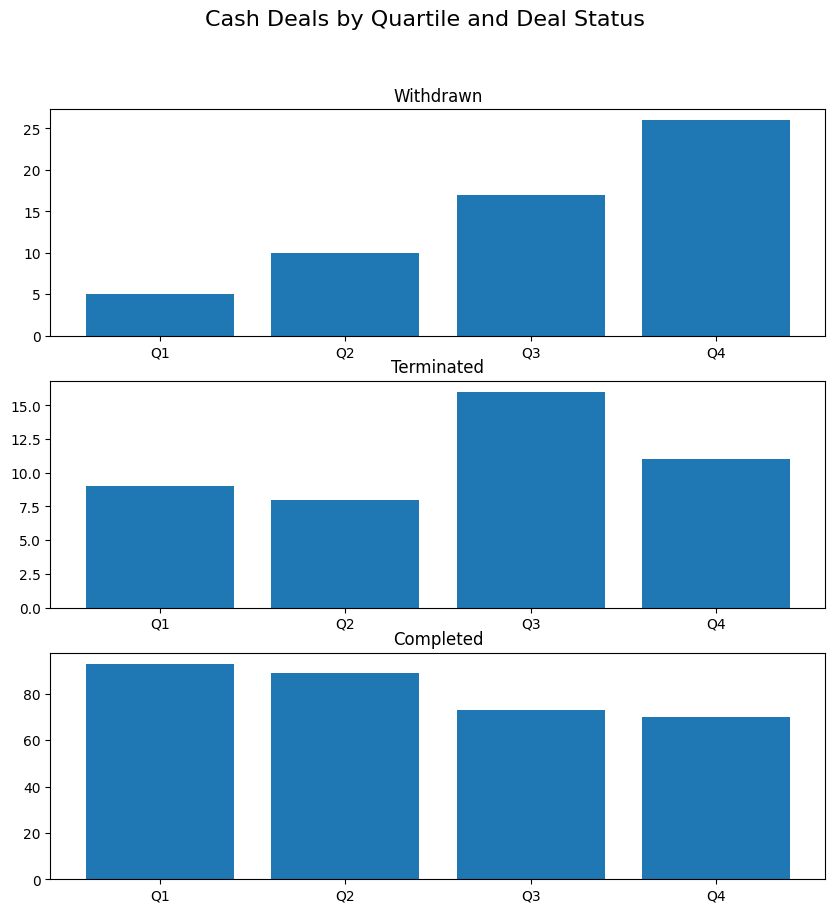

In [12]:
# make withdrawn, terminated, and completed count histograms
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Cash Deals by Quartile and Deal Status', fontsize=16)
axs[0].bar(['Q1', 'Q2', 'Q3', 'Q4'], [q1_withdrawn, q2_withdrawn, q3_withdrawn, q4_withdrawn])
axs[0].set_title('Withdrawn')
axs[1].bar(['Q1', 'Q2', 'Q3', 'Q4'], [q1_terminated, q2_terminated, q3_terminated, q4_terminated])
axs[1].set_title('Terminated')
axs[2].bar(['Q1', 'Q2', 'Q3', 'Q4'], [q1_completed, q2_completed, q3_completed, q4_completed])
axs[2].set_title('Completed')
plt.show()